In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [2]:
TS_CSV = './602_gcc_s_ts.csv'
CONFIG_CSV='./602_gcc_s_regret_out.csv'

In [3]:
df = pd.read_csv(TS_CSV)
df.head()


,Timestamp,run_warm_up,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,...,run_43,run_44,run_45,run_46,run_47,run_48,run_49,run_50,run_default_jemalloc,run_default_tcmalloc
0,0,0.003205,0.006593,0.006372,0.005360,0.005571,0.005301,0.005525,0.002751,0.008189,...,0.003180,0.003335,0.003283,0.006333,0.003248,0.003387,0.003196,0.003176,0.004523,0.006226
1,1,0.270352,0.274002,0.282616,0.261018,0.277970,0.267510,0.206266,0.287933,0.290928,...,0.271991,0.277788,0.271507,0.283440,0.267296,0.255710,0.264207,0.272068,0.268328,0.284394


In [4]:
configs = pd.read_csv(CONFIG_CSV)
configs.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
0,True,False,10348,primary,11,8,18,always,26597,168,14960290,disabled,False,True,always,True,0.003519
1,False,True,43638,secondary,21,25,51,always,17643,631,18518639,phycpu,True,False,never,False,0.007715
2,False,False,23703,disabled,17,20,40,auto,3104,324,32026549,percpu,False,True,never,True,-0.003590
3,True,True,28671,primary,1,8,73,disabled,43285,158,1473404,disabled,True,False,default,False,0.004991
4,True,False,48974,primary,5,15,24,auto,8170,524,27692738,disabled,False,False,default,False,-0.000373


In [5]:
configs.nsmallest(5, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
15,True,True,37698,disabled,23,13,78,disabled,40055,495,14115204,percpu,False,False,never,False,-0.134112
37,False,True,17721,secondary,11,7,47,disabled,32294,500,17549820,percpu,True,False,never,False,-0.034942
14,False,False,8314,primary,9,29,35,auto,6137,309,19510603,phycpu,True,True,default,True,-0.034430
9,False,True,13062,secondary,11,22,65,disabled,45928,375,10043633,phycpu,False,True,default,True,-0.031732
5,False,True,3355,disabled,15,28,69,disabled,49156,278,5790223,phycpu,True,True,never,True,-0.030883


In [6]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i}' in df.columns]
selected_columns

['run_16', 'run_38', 'run_15']

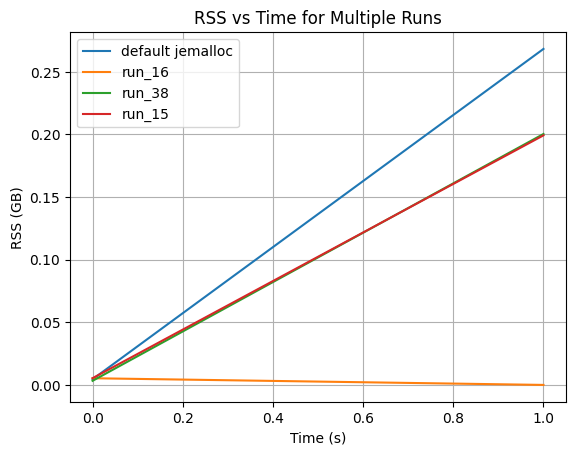

In [7]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(TS_CSV)

# Extract timestamps and RSS values for each run
timestamps = df['Timestamp']
warmup = df['run_warm_up']
default = df['run_default_jemalloc']
tc_default = df['run_default_tcmalloc']

# plt.plot(timestamps, warmup / (1024*1024), label='warm_up')
plt.plot(timestamps, default, label='default jemalloc')
#plt.plot(timestamps, tc_default / (1024*1024), label='default tcmalloc')
for column in selected_columns:  # Skip 'Timestamp'
    plt.plot(timestamps, df[column], label=column)

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('RSS (GB)')
plt.title('RSS vs Time for Multiple Runs')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


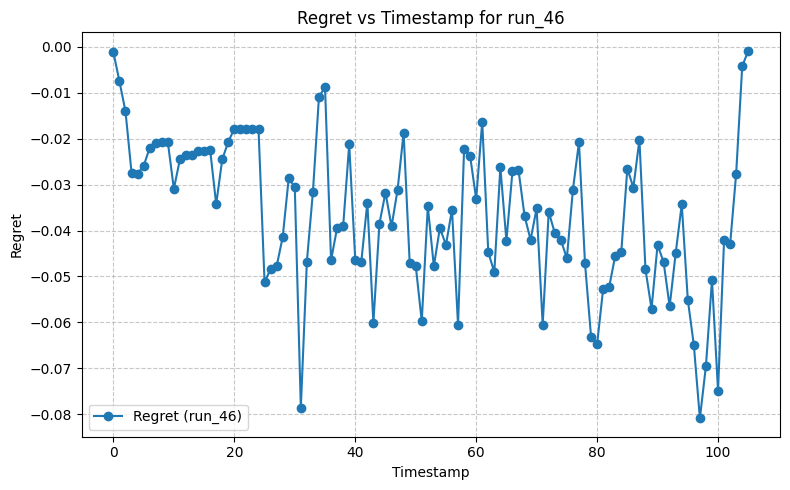

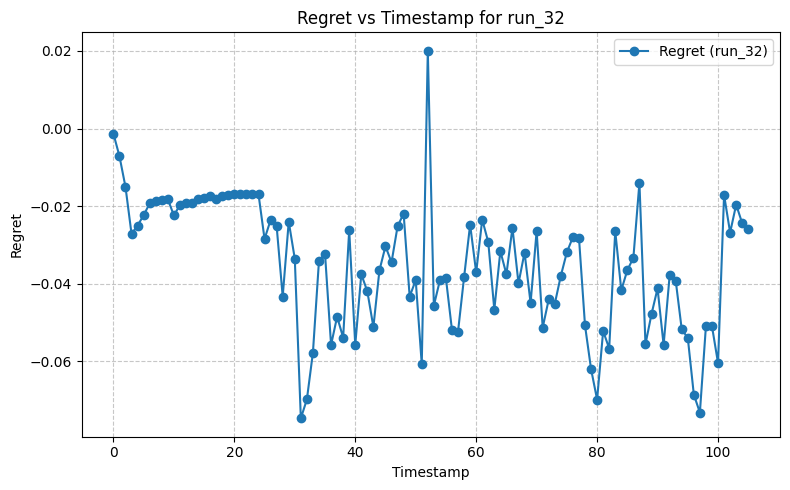

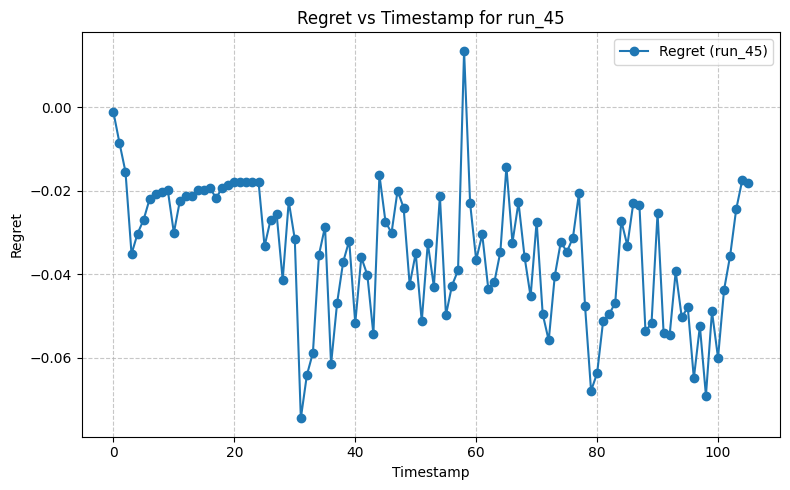

In [9]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i+1}' in df.columns]

# Step 3: Generate separate plots for each selected column
for column in selected_columns:
    # Calculate regret for the current column
    regret =  (df[column] - df['run_default_jemalloc'])
    
    # Create a new plot for this column
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the regret against the index
    ax.plot(regret.index, regret.values, marker='o', label=f'Regret ({column})')
    
    # Customize the plot
    ax.set_title(f'Regret vs Timestamp for {column}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Regret')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [3]:
TIMESERIES_FILE = './538_imagick_r_timeseries.csv'
csvfile = pd.read_csv(TIMESERIES_FILE)
timestamps = csvfile['Timestamp']
rss_values = csvfile['RSS'] / (1024*1024)

# Plotting the RSS values over time
plt.plot(timestamps, rss_values, label='RSS over Time', marker='o')
plt.xlabel('Time (s)')  # X-axis label
plt.ylabel('RSS (MB)')  # Y-axis label
plt.title('RSS vs Time')  # Title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Add a grid for better readability

# Display the plot in the notebook
plt.show()


EmptyDataError: No columns to parse from file